# Global Power Plant Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

Importing required libraries

In [2]:
gb=pd.read_csv("global.csv")

Dataset imported

In [3]:
gb.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Sample data  of dataset

As we want to predict the primary fuel we want to build classifcation problem

In [4]:
gb.shape

(908, 25)

Dataset have 908 rows and 25 columns

In [5]:
gb.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Dataset have float and categorical datatypes

In [6]:
gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We can observe the null values,datatypes of each columns and memory usage of dataset

In [7]:
gb.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can observe the missing values in columns 

In [8]:
gb.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


Statistical summary of dataset. Here other fuel 3 column have no datas,maximum energy in 2013 is 27586 gigawatt

# Treating missing values

In [9]:
gb.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [10]:
gb.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

Dropped columns which have high number of missing values

In [11]:
#mean
gb['latitude']=gb['latitude'].fillna(gb['latitude'].mean())

gb['longitude']=gb['longitude'].fillna(gb['longitude'].mean())

gb['commissioning_year']=gb['commissioning_year'].fillna(gb['commissioning_year'].mean())

gb['generation_gwh_2013']=gb['generation_gwh_2013'].fillna(gb['generation_gwh_2013'].mean())

gb['generation_gwh_2014']=gb['generation_gwh_2014'].fillna(gb['generation_gwh_2014'].mean())

gb['generation_gwh_2015']=gb['generation_gwh_2015'].fillna(gb['generation_gwh_2015'].mean())

gb['generation_gwh_2016']=gb['generation_gwh_2016'].fillna(gb['generation_gwh_2016'].mean())

gb['generation_gwh_2017']=gb['generation_gwh_2017'].fillna(gb['generation_gwh_2017'].mean())

Treated missing values with mean

In [12]:
#mode
gb['geolocation_source']=gb['geolocation_source'].fillna(gb['geolocation_source'].mode()[0])

gb['owner']=gb['owner'].fillna(gb['owner'].mode()[0])

Treated missing values with mode

In [13]:
gb['other_fuel1']=gb['other_fuel1'].fillna(gb['other_fuel1'].mode()[0])

Treated missing values otherfuel1 column with mode

In [14]:
print(gb['country'].value_counts())
print(gb['country_long'].value_counts())
print(gb['year_of_capacity_data'].value_counts())
print(gb['generation_data_source'].value_counts())

IND    908
Name: country, dtype: int64
India    908
Name: country_long, dtype: int64
2018.0    520
Name: year_of_capacity_data, dtype: int64
Central Electricity Authority    450
Name: generation_data_source, dtype: int64


In these columns there is only one unique value and it will not affect for prediction so let's drop it

In [15]:
gb.drop(['country','country_long','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

Dropped columns which is not needed

In [16]:
gb.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

 Now we can observe the no missing values,dropped which have high number of missing values,treated with mode and mean in other columns

# Visualizations

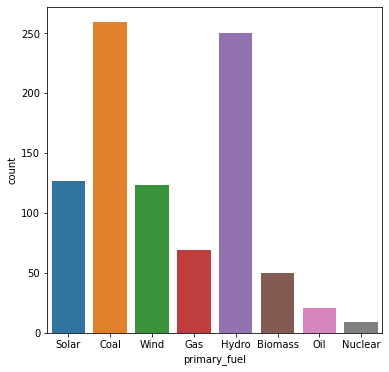

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [17]:
plt.figure(figsize=(6,6))
sns.countplot('primary_fuel',data=gb)
plt.show()
gb['primary_fuel'].value_counts()

Most of the primary fuel is coal as this is our target varibale we can observe the imbalance of the data

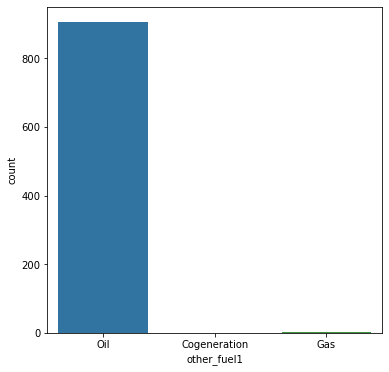

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [18]:
plt.figure(figsize=(6,6))
sns.countplot('other_fuel1',data=gb)
plt.show()
gb['other_fuel1'].value_counts()

Most of the other fue where oil

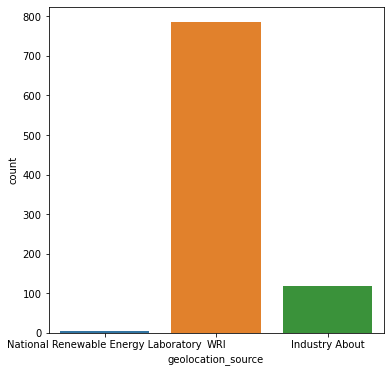

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [19]:
plt.figure(figsize=(6,6))
sns.countplot('geolocation_source',data=gb)
plt.show()
gb['geolocation_source'].value_counts()

Most of the source is from WRI

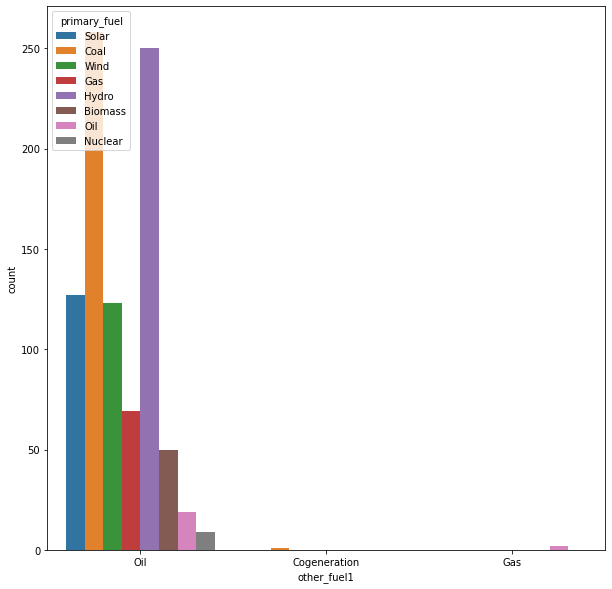

In [20]:
plt.figure(figsize=(10,10))
sns.countplot('other_fuel1',hue='primary_fuel',data=gb)
plt.show()

Most of the primary fuel where coal and oil

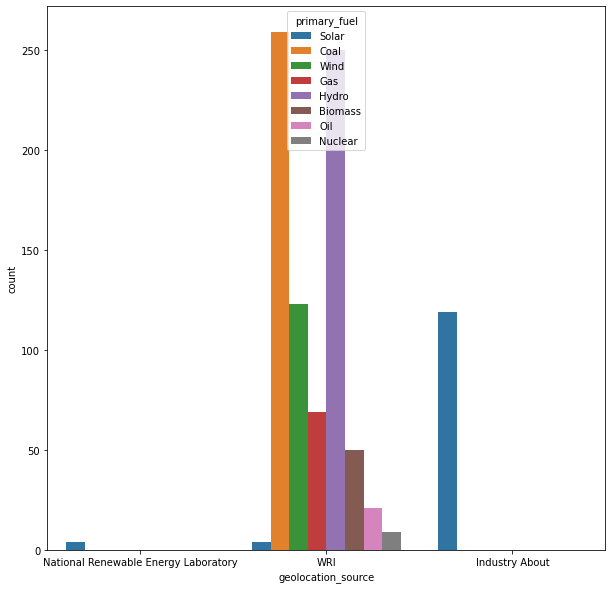

In [21]:
plt.figure(figsize=(10,10))
sns.countplot('geolocation_source',hue='primary_fuel',data=gb)
plt.show()

As per report from WRI most of fuels where coal and oil

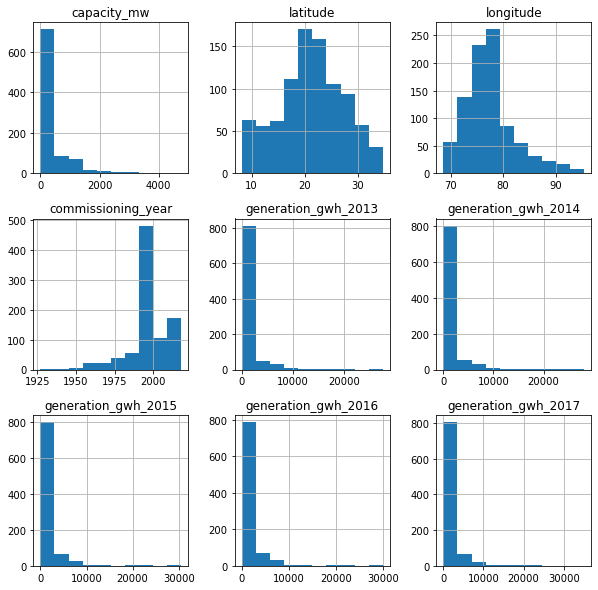

In [22]:
gb.hist(figsize=(10,10),layout=(3,3))
plt.show()

Lattitude are normally distributed,capacity megawatt between 0-1000,most of longitude values between 70-80, most of the commissioning year is between 1995-2000,
generation ofeach year is approaximately same

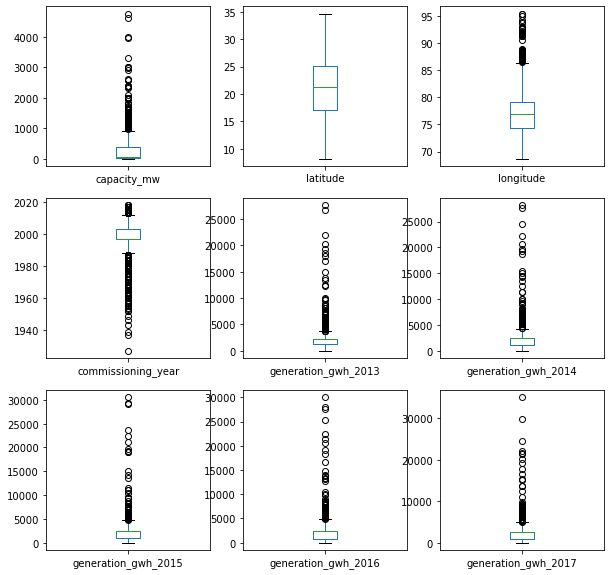

In [23]:
gb.plot(kind='box',figsize=(10,10),layout=(3,3),sharex=False,subplots=True)
plt.show()

Presence of outliers in some columns

In [24]:
latitude_pivot=gb.pivot_table(index='primary_fuel',values='latitude',aggfunc=np.median)

comparing latitude and primary_fuel using pivot table

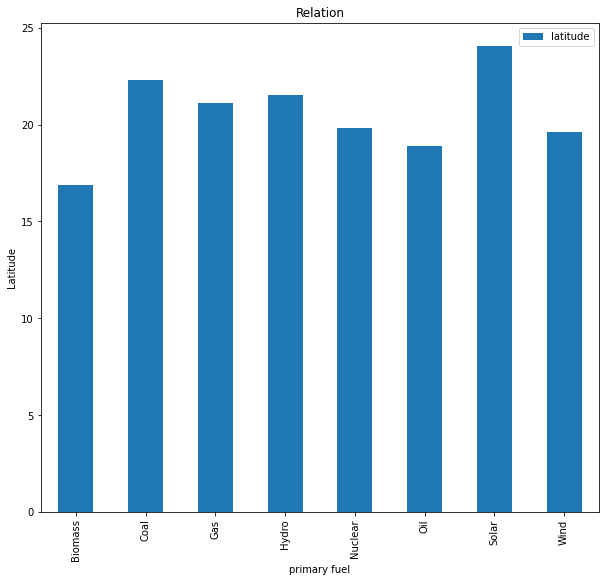

In [25]:
#plotting 
latitude_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("primary fuel")
plt.ylabel("Latitude")
plt.title("Relation")
plt.show()

Solar have high latitude among other fuels

In [26]:
longitude_pivot=gb.pivot_table(index='primary_fuel',values='longitude',aggfunc=np.median)

Comparing longitude and primary fuel

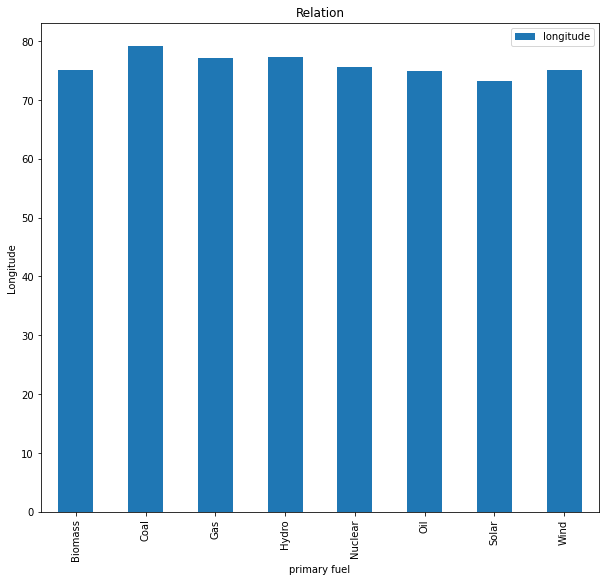

In [27]:
#plotting 
longitude_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("primary fuel")
plt.ylabel("Longitude")
plt.title("Relation")
plt.show()

Longitude of all fuel is aproaximately equal

In [29]:
capacity_pivot=gb.pivot_table(index='primary_fuel',values='capacity_mw',aggfunc=np.median)

Comparing capacity and primary fuel using pivot table

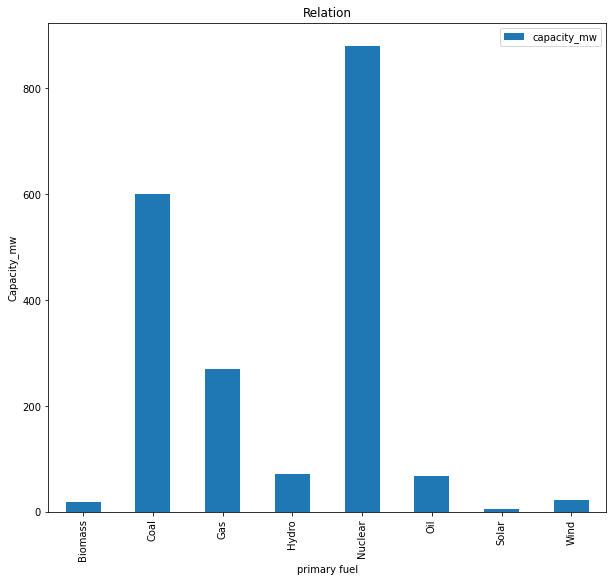

In [30]:
#plotting 
capacity_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("primary fuel")
plt.ylabel("Capacity_mw")
plt.title("Relation")
plt.show()

Most of capacity generated in nuclear

In [31]:
generation_2013_pivot=gb.pivot_table(index='primary_fuel',values='generation_gwh_2013',aggfunc=np.median)

Comparing primary fuel and generation in year 2013

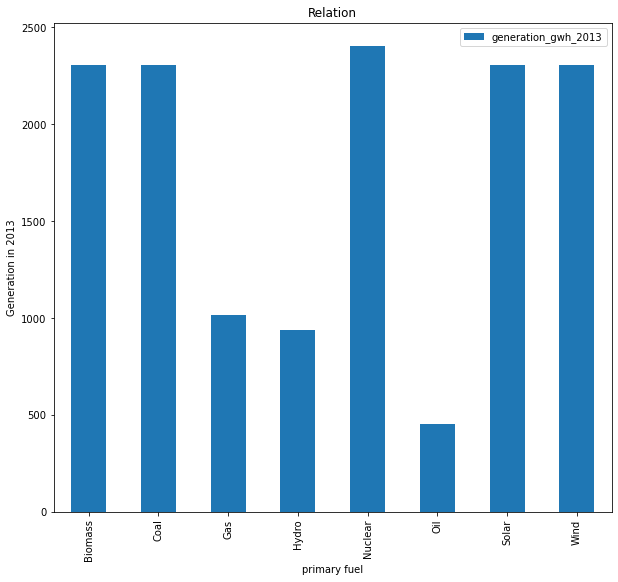

In [32]:
#plotting 
generation_2013_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("primary fuel")
plt.ylabel("Generation in 2013")
plt.title("Relation")
plt.show()

Nuclear fuel is used in 2013

In [33]:
generation_2014_pivot=gb.pivot_table(index='primary_fuel',values='generation_gwh_2014',aggfunc=np.mean)

Comparing fuel and generation in 2014

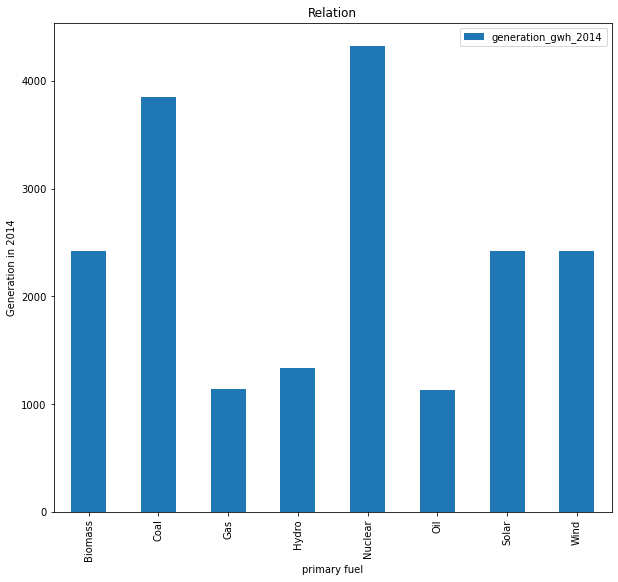

In [34]:
#plotting 
generation_2014_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("primary fuel")
plt.ylabel("Generation in 2014")
plt.title("Relation")
plt.show()

Mostly used fuel is nuclear in 2014

In [35]:
generation_2015_pivot=gb.pivot_table(index='primary_fuel',values='generation_gwh_2015',aggfunc=np.mean)

Comparing fuel and generation in year 2015

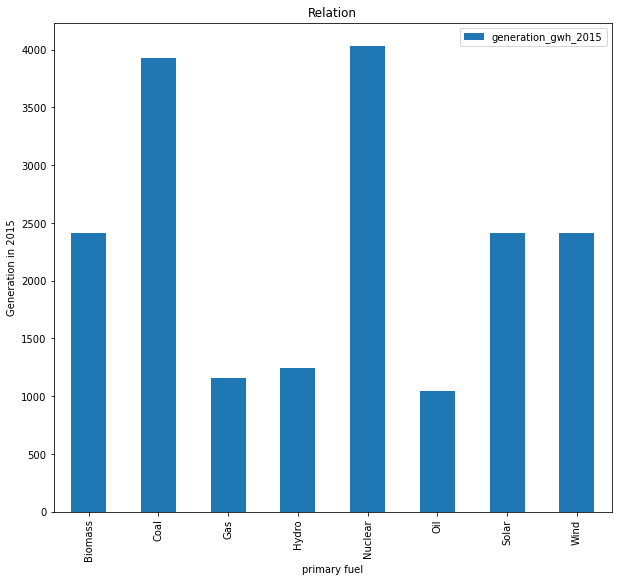

In [36]:
#plotting 
generation_2015_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("primary fuel")
plt.ylabel("Generation in 2015")
plt.title("Relation")
plt.show()

In year 2015 also nuclear generated higher power

In [37]:
generation_2016_pivot=gb.pivot_table(index='primary_fuel',values='generation_gwh_2016',aggfunc=np.mean)

Comparing generation in year 2016 and primary fuel

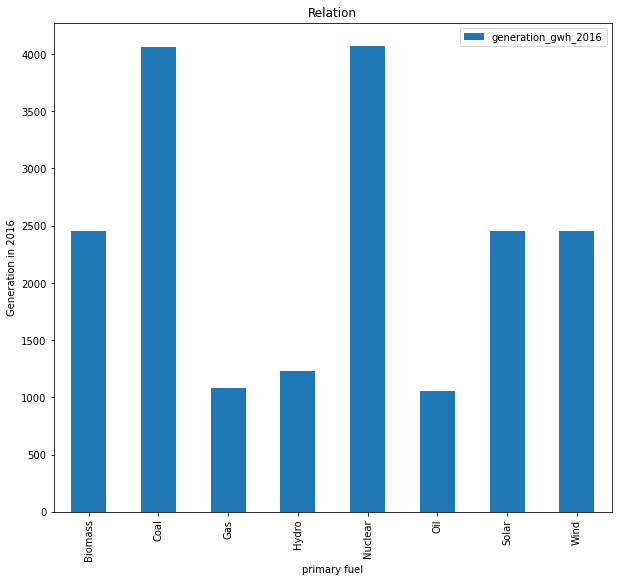

In [38]:
#plotting 
generation_2016_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("primary fuel")
plt.ylabel("Generation in 2016")
plt.title("Relation")
plt.show()

Here coal and nuclear is used

In [39]:
generation_2017_pivot=gb.pivot_table(index='primary_fuel',values='generation_gwh_2017',aggfunc=np.mean)

Comparing genration and primary fuel

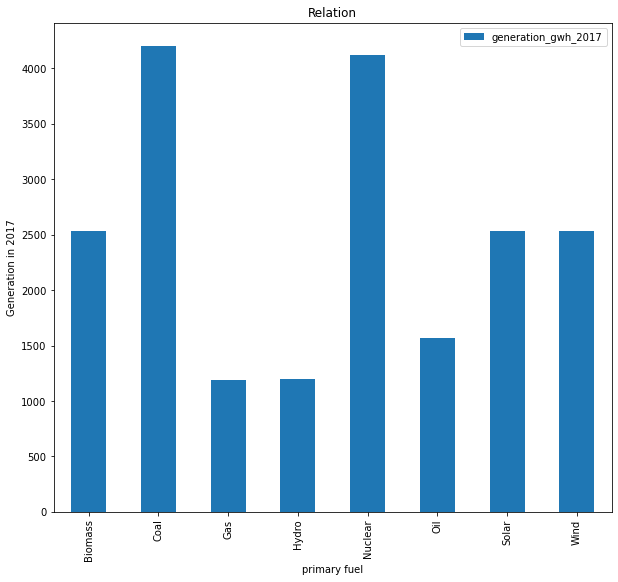

In [40]:
#plotting 
generation_2017_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("primary fuel")
plt.ylabel("Generation in 2017")
plt.title("Relation")
plt.show()

In year 2017 also nuclear is used

# Encoding

In [41]:
gb['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [42]:
gb.replace({'primary_fuel':{'Coal': 0,'Hydro': 1,'Solar': 2,'Wind': 3,'Gas': 4,'Biomass': 5,'Oil': 6,'Nuclear':7}},inplace=True)

In [43]:
gb['primary_fuel'].value_counts()

0    259
1    250
2    127
3    123
4     69
5     50
6     21
7      9
Name: primary_fuel, dtype: int64

Replaced categorical values in target variable with numbers

# Correlation

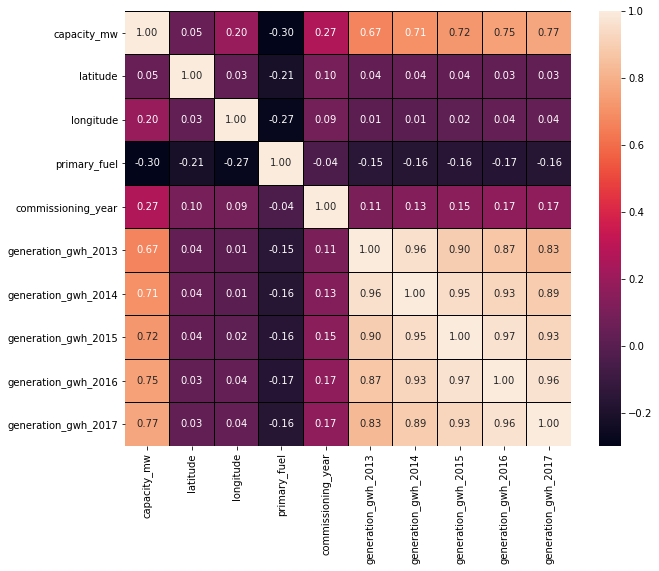

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(gb.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

Here every other features were negatively correlated to primary fuel,capacity is highly correlated to primary fuel,capacity and generation were highly correlated to each other

In [46]:
gb['other_fuel1'].value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [47]:
gb.replace({'other_fuel1':{'Oil': 6,'Gas': 4,'Cogeneration': 0}},inplace=True)

In [48]:
gb['other_fuel1'].value_counts()

6    905
4      2
0      1
Name: other_fuel1, dtype: int64

Replaced oil and gas value as asame as in primary fuel for recognition

In [50]:
le=LabelEncoder()
var=['name','gppd_idnr','owner','source','url','geolocation_source']
#storing column names to encode

for i in var:
    gb[i]=le.fit_transform(gb[i])

Encoded other categrical columns using label encoder

In [51]:
gb.head(5)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,2.5,28.1839,73.2407,2,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,520,98.0,24.7663,74.6090,0,6,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,854,39.2,21.9038,69.3732,3,6,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,0,135.0,23.8712,91.3602,4,6,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,1,1800.0,21.9603,82.4091,0,6,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


Features encoded

# Outliers Removal

In [52]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(gb))
gb_new=gb[(z<3).all(axis=1)]

Removed outliers using zscore

In [53]:
gb.shape

(908, 17)

Shape of dataset before removing outliers

In [54]:
gb_new.shape

(823, 17)

After removing outliers

In [59]:
print("Percentage of data loss after removing outliers:",(908-823)/908*100)

Percentage of data loss after removing outliers: 9.361233480176212


9% of data were lossed after removing outliers so I proceed with not removing outliers

# Skewness

In [60]:
gb.skew()

name                    0.000000
gppd_idnr               0.000000
capacity_mw             3.193257
latitude               -0.147391
longitude               1.129836
primary_fuel            0.929465
other_fuel1           -23.931919
commissioning_year     -1.383330
owner                   1.366078
source                  1.829145
url                     1.512258
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

Skewness present in some columns

# Seperating Features and target

In [61]:
x=gb.drop('primary_fuel', axis = 1)
y = gb['primary_fuel']

Seperated

In [62]:
x.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,520,98.0,24.7663,74.6090,6,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,854,39.2,21.9038,69.3732,6,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,0,135.0,23.8712,91.3602,6,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,1,1800.0,21.9603,82.4091,6,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


Sample  data of features

In [63]:
pd.DataFrame(y.head())

,primary_fuel
0,2
1,0
2,3
3,4
4,0


Sample data of target

# Removal of skewness

In [64]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Skewness removed using power transform

# Scaling

In [65]:
sc=StandardScaler()
x=sc.fit_transform(x)

Features scaled using standard scaler

# Balancing Target variable

# Over Sampling

In [66]:
y.value_counts()

0    259
1    250
2    127
3    123
4     69
5     50
6     21
7      9
Name: primary_fuel, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Balanced data using smote

In [68]:
y.value_counts()

0    259
2    259
4    259
6    259
1    259
3    259
5    259
7    259
Name: primary_fuel, dtype: int64

Balanced

# Model Building

In [69]:
#logistic regression
lr=LogisticRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training accuarcy is:- 0.8095238095238095
At random state 0,the testing accuracy is:- 0.7837837837837838


At random state 1,the training accuarcy is:- 0.8198198198198198
At random state 1,the testing accuracy is:- 0.7953667953667953


At random state 2,the training accuarcy is:- 0.8063063063063063
At random state 2,the testing accuracy is:- 0.7895752895752896


At random state 3,the training accuarcy is:- 0.8108108108108109
At random state 3,the testing accuracy is:- 0.7915057915057915


At random state 4,the training accuarcy is:- 0.8101673101673101
At random state 4,the testing accuracy is:- 0.803088803088803


At random state 5,the training accuarcy is:- 0.8005148005148005
At random state 5,the testing accuracy is:- 0.8127413127413128


At random state 6,the training accuarcy is:- 0.8075933075933076
At random state 6,the testing accuracy is:- 0.8088803088803089


At random state 6 model performs well
At random state 7,the training accuarcy is:- 0.8056628056628

At random state 60,the training accuarcy is:- 0.8114543114543115
At random state 60,the testing accuracy is:- 0.805019305019305


At random state 60 model performs well
At random state 61,the training accuarcy is:- 0.803088803088803
At random state 61,the testing accuracy is:- 0.8088803088803089


At random state 62,the training accuarcy is:- 0.8120978120978121
At random state 62,the testing accuracy is:- 0.7915057915057915


At random state 63,the training accuarcy is:- 0.8056628056628057
At random state 63,the testing accuracy is:- 0.8088803088803089


At random state 63 model performs well
At random state 64,the training accuarcy is:- 0.8043758043758044
At random state 64,the testing accuracy is:- 0.7972972972972973


At random state 64 model performs well
At random state 65,the training accuarcy is:- 0.8056628056628057
At random state 65,the testing accuracy is:- 0.7876447876447876


At random state 66,the training accuarcy is:- 0.803088803088803
At random state 66,the testing accu

At random state 120,the training accuarcy is:- 0.8108108108108109
At random state 120,the testing accuracy is:- 0.803088803088803


At random state 121,the training accuarcy is:- 0.8043758043758044
At random state 121,the testing accuracy is:- 0.8108108108108109


At random state 122,the training accuarcy is:- 0.8159588159588159
At random state 122,the testing accuracy is:- 0.7934362934362934


At random state 123,the training accuarcy is:- 0.8101673101673101
At random state 123,the testing accuracy is:- 0.8088803088803089


At random state 123 model performs well
At random state 124,the training accuarcy is:- 0.8127413127413128
At random state 124,the testing accuracy is:- 0.7702702702702703


At random state 125,the training accuarcy is:- 0.7953667953667953
At random state 125,the testing accuracy is:- 0.8243243243243243


At random state 126,the training accuarcy is:- 0.803088803088803
At random state 126,the testing accuracy is:- 0.8223938223938224


At random state 127,the trainin

At random state 178,the training accuarcy is:- 0.8127413127413128
At random state 178,the testing accuracy is:- 0.7837837837837838


At random state 179,the training accuarcy is:- 0.8075933075933076
At random state 179,the testing accuracy is:- 0.7915057915057915


At random state 180,the training accuarcy is:- 0.803088803088803
At random state 180,the testing accuracy is:- 0.8127413127413128


At random state 181,the training accuarcy is:- 0.8166023166023166
At random state 181,the testing accuracy is:- 0.7760617760617761


At random state 182,the training accuarcy is:- 0.8108108108108109
At random state 182,the testing accuracy is:- 0.805019305019305


At random state 182 model performs well
At random state 183,the training accuarcy is:- 0.8063063063063063
At random state 183,the testing accuracy is:- 0.8108108108108109


At random state 183 model performs well
At random state 184,the training accuarcy is:- 0.8082368082368082
At random state 184,the testing accuracy is:- 0.8243243243

Splitted data into trained and test data and finding best random states

In [70]:
l

[6,
 12,
 13,
 20,
 25,
 26,
 29,
 39,
 47,
 48,
 60,
 63,
 64,
 66,
 77,
 87,
 98,
 109,
 112,
 115,
 123,
 133,
 136,
 138,
 143,
 145,
 147,
 149,
 151,
 160,
 168,
 171,
 177,
 182,
 183,
 187,
 199]

List of best random states

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)
print(confusion_matrix(y_test,predlr))

              precision    recall  f1-score   support

           0       0.77      0.51      0.61        67
           1       0.61      0.58      0.59        57
           2       1.00      1.00      1.00        61
           3       0.95      1.00      0.98        63
           4       0.63      0.59      0.61        63
           5       0.87      0.99      0.92        67
           6       0.79      0.86      0.83        66
           7       0.78      0.91      0.84        74

    accuracy                           0.81       518
   macro avg       0.80      0.80      0.80       518
weighted avg       0.80      0.81      0.80       518

[[34  2  0  1  7  7  3 13]
 [ 4 33  0  0 12  0  5  3]
 [ 0  0 61  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0]
 [ 3 11  0  0 37  2  7  3]
 [ 0  0  0  1  0 66  0  0]
 [ 2  2  0  1  3  1 57  0]
 [ 1  6  0  0  0  0  0 67]]


applied best random states ,printing accuracy and  confusion matrix for logistic regression

In [72]:
dt=DecisionTreeClassifier()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.8494208494208494


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.8841698841698842


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.88996138996139


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.8725868725868726


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.9111969111969112


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.8687258687258688


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.8918918918918919


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.8822393822393823


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy is

At random state 77,the training accuarcy is:- 1.0
At random state 77,the testing accuracy is:- 0.8706563706563707


At random state 78,the training accuarcy is:- 1.0
At random state 78,the testing accuracy is:- 0.862934362934363


At random state 79,the training accuarcy is:- 1.0
At random state 79,the testing accuracy is:- 0.8803088803088803


At random state 80,the training accuarcy is:- 1.0
At random state 80,the testing accuracy is:- 0.8725868725868726


At random state 81,the training accuarcy is:- 1.0
At random state 81,the testing accuracy is:- 0.888030888030888


At random state 82,the training accuarcy is:- 1.0
At random state 82,the testing accuracy is:- 0.8803088803088803


At random state 83,the training accuarcy is:- 1.0
At random state 83,the testing accuracy is:- 0.8783783783783784


At random state 84,the training accuarcy is:- 1.0
At random state 84,the testing accuracy is:- 0.8687258687258688


At random state 85,the training accuarcy is:- 1.0
At random state 85,the t

At random state 153,the testing accuracy is:- 0.8822393822393823


At random state 154,the training accuarcy is:- 1.0
At random state 154,the testing accuracy is:- 0.8822393822393823


At random state 155,the training accuarcy is:- 1.0
At random state 155,the testing accuracy is:- 0.8745173745173745


At random state 156,the training accuarcy is:- 1.0
At random state 156,the testing accuracy is:- 0.8861003861003861


At random state 157,the training accuarcy is:- 1.0
At random state 157,the testing accuracy is:- 0.8764478764478765


At random state 158,the training accuarcy is:- 1.0
At random state 158,the testing accuracy is:- 0.8957528957528957


At random state 159,the training accuarcy is:- 1.0
At random state 159,the testing accuracy is:- 0.8803088803088803


At random state 160,the training accuarcy is:- 1.0
At random state 160,the testing accuracy is:- 0.8938223938223938


At random state 161,the training accuarcy is:- 1.0
At random state 161,the testing accuracy is:- 0.89189189

Splitted data into train and test data and find best random state for decisiontree

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=184)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_d=classification_report(y_test,preddt)
print(acc_d)
print(confusion_matrix(y_test,preddt))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        64
           1       0.84      0.82      0.83        77
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        62
           4       0.80      0.79      0.80        57
           5       0.98      0.95      0.97        66
           6       0.88      0.99      0.93        72
           7       0.94      0.97      0.96        66

    accuracy                           0.90       518
   macro avg       0.90      0.90      0.90       518
weighted avg       0.90      0.90      0.90       518

[[43  8  0  0  7  1  3  2]
 [ 8 63  0  0  2  0  2  2]
 [ 0  0 54  0  0  0  0  0]
 [ 0  0  0 62  0  0  0  0]
 [ 3  4  0  0 45  0  5  0]
 [ 1  0  0  0  2 63  0  0]
 [ 1  0  0  0  0  0 71  0]
 [ 2  0  0  0  0  0  0 64]]


Applied best random states and print accuracy score and confusion matrix for decision tree

In [76]:
#SVC
sv=SVC()
s=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        s.append(i)

At random state 0,the training accuarcy is:- 0.8906048906048906
At random state 0,the testing accuracy is:- 0.861003861003861


At random state 1,the training accuarcy is:- 0.898970398970399
At random state 1,the testing accuracy is:- 0.8571428571428571


At random state 2,the training accuarcy is:- 0.8931788931788932
At random state 2,the testing accuracy is:- 0.8687258687258688


At random state 3,the training accuarcy is:- 0.8983268983268984
At random state 3,the testing accuracy is:- 0.8745173745173745


At random state 4,the training accuarcy is:- 0.898970398970399
At random state 4,the testing accuracy is:- 0.8706563706563707


At random state 5,the training accuarcy is:- 0.8918918918918919
At random state 5,the testing accuracy is:- 0.9073359073359073


At random state 6,the training accuarcy is:- 0.8970398970398971
At random state 6,the testing accuracy is:- 0.8803088803088803


At random state 7,the training accuarcy is:- 0.8970398970398971
At random state 7,the testing accura

At random state 62,the training accuarcy is:- 0.8944658944658944
At random state 62,the testing accuracy is:- 0.8648648648648649


At random state 63,the training accuarcy is:- 0.8944658944658944
At random state 63,the testing accuracy is:- 0.8861003861003861


At random state 63 model performs well
At random state 64,the training accuarcy is:- 0.8996138996138996
At random state 64,the testing accuracy is:- 0.859073359073359


At random state 65,the training accuarcy is:- 0.9047619047619048
At random state 65,the testing accuracy is:- 0.8532818532818532


At random state 66,the training accuarcy is:- 0.9009009009009009
At random state 66,the testing accuracy is:- 0.8783783783783784


At random state 67,the training accuarcy is:- 0.8931788931788932
At random state 67,the testing accuracy is:- 0.8648648648648649


At random state 68,the training accuarcy is:- 0.8957528957528957
At random state 68,the testing accuracy is:- 0.8513513513513513


At random state 69,the training accuarcy is:-

At random state 123,the training accuarcy is:- 0.8886743886743886
At random state 123,the testing accuracy is:- 0.8706563706563707


At random state 124,the training accuarcy is:- 0.9124839124839125
At random state 124,the testing accuracy is:- 0.8552123552123552


At random state 125,the training accuarcy is:- 0.8912483912483913
At random state 125,the testing accuracy is:- 0.8957528957528957


At random state 126,the training accuarcy is:- 0.898970398970399
At random state 126,the testing accuracy is:- 0.8822393822393823


At random state 127,the training accuarcy is:- 0.9054054054054054
At random state 127,the testing accuracy is:- 0.8281853281853282


At random state 128,the training accuarcy is:- 0.9034749034749034
At random state 128,the testing accuracy is:- 0.8436293436293436


At random state 129,the training accuarcy is:- 0.8970398970398971
At random state 129,the testing accuracy is:- 0.8783783783783784


At random state 130,the training accuarcy is:- 0.9041184041184042
At r

At random state 183,the training accuarcy is:- 0.8841698841698842
At random state 183,the testing accuracy is:- 0.9111969111969112


At random state 184,the training accuarcy is:- 0.8931788931788932
At random state 184,the testing accuracy is:- 0.8725868725868726


At random state 185,the training accuarcy is:- 0.8918918918918919
At random state 185,the testing accuracy is:- 0.88996138996139


At random state 185 model performs well
At random state 186,the training accuarcy is:- 0.8912483912483913
At random state 186,the testing accuracy is:- 0.8764478764478765


At random state 187,the training accuarcy is:- 0.8938223938223938
At random state 187,the testing accuracy is:- 0.88996138996139


At random state 187 model performs well
At random state 188,the training accuarcy is:- 0.8963963963963963
At random state 188,the testing accuracy is:- 0.8725868725868726


At random state 189,the training accuarcy is:- 0.8957528957528957
At random state 189,the testing accuracy is:- 0.870656370656

Splitted data into train and test data and finding best random states

In [77]:
s

[24,
 29,
 43,
 63,
 71,
 81,
 83,
 87,
 114,
 118,
 142,
 149,
 159,
 174,
 179,
 182,
 185,
 187]

List of best random states

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=187)
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
acc_s=classification_report(y_test,predsv)
print(acc_s)
print(confusion_matrix(y_test,predsv))

              precision    recall  f1-score   support

           0       0.80      0.58      0.67        57
           1       0.82      0.80      0.81        59
           2       1.00      0.97      0.99        68
           3       0.99      1.00      0.99        70
           4       0.75      0.81      0.78        69
           5       0.90      1.00      0.95        65
           6       0.92      0.90      0.91        60
           7       0.91      1.00      0.95        70

    accuracy                           0.89       518
   macro avg       0.89      0.88      0.88       518
weighted avg       0.89      0.89      0.89       518

[[33  4  0  0  9  6  0  5]
 [ 1 47  0  0  9  0  0  2]
 [ 2  0 66  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0]
 [ 2  5  0  0 56  1  5  0]
 [ 0  0  0  0  0 65  0  0]
 [ 3  1  0  1  1  0 54  0]
 [ 0  0  0  0  0  0  0 70]]


Applied best random state and print accuracy and confusion matrix for support vector

# Ensemble Techniques

In [81]:
#Random Forest classifier 
rf=RandomForestClassifier()
r=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.9362934362934363


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.9266409266409267


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.9227799227799228


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.9227799227799228


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.9401544401544402


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.9266409266409267


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.9266409266409267


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.9343629343629344


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy 

At random state 71,the training accuarcy is:- 1.0
At random state 71,the testing accuracy is:- 0.9420849420849421


At random state 72,the training accuarcy is:- 1.0
At random state 72,the testing accuracy is:- 0.918918918918919


At random state 73,the training accuarcy is:- 1.0
At random state 73,the testing accuracy is:- 0.9324324324324325


At random state 74,the training accuarcy is:- 1.0
At random state 74,the testing accuracy is:- 0.918918918918919


At random state 75,the training accuarcy is:- 1.0
At random state 75,the testing accuracy is:- 0.9324324324324325


At random state 76,the training accuarcy is:- 1.0
At random state 76,the testing accuracy is:- 0.9343629343629344


At random state 77,the training accuarcy is:- 1.0
At random state 77,the testing accuracy is:- 0.9208494208494209


At random state 78,the training accuarcy is:- 1.0
At random state 78,the testing accuracy is:- 0.9015444015444015


At random state 79,the training accuarcy is:- 1.0
At random state 79,the t

At random state 142,the training accuarcy is:- 1.0
At random state 142,the testing accuracy is:- 0.9362934362934363


At random state 143,the training accuarcy is:- 1.0
At random state 143,the testing accuracy is:- 0.9208494208494209


At random state 144,the training accuarcy is:- 1.0
At random state 144,the testing accuracy is:- 0.9305019305019305


At random state 145,the training accuarcy is:- 1.0
At random state 145,the testing accuracy is:- 0.9285714285714286


At random state 146,the training accuarcy is:- 1.0
At random state 146,the testing accuracy is:- 0.918918918918919


At random state 147,the training accuarcy is:- 1.0
At random state 147,the testing accuracy is:- 0.9111969111969112


At random state 148,the training accuarcy is:- 1.0
At random state 148,the testing accuracy is:- 0.944015444015444


At random state 149,the training accuarcy is:- 1.0
At random state 149,the testing accuracy is:- 0.9285714285714286


At random state 150,the training accuarcy is:- 1.0
At rand

Splitted data into trained and test data finding bets random states

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=195)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_r=classification_report(y_test,predrf)
print(acc_r)
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.93      0.71      0.80        72
           1       0.92      0.88      0.90        50
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        69
           4       0.89      0.98      0.94        59
           5       0.91      0.98      0.95        63
           6       0.95      1.00      0.97        55
           7       0.93      1.00      0.97        71

    accuracy                           0.94       518
   macro avg       0.94      0.94      0.94       518
weighted avg       0.94      0.94      0.94       518

[[51  4  0  0  5  6  2  4]
 [ 3 44  0  0  2  0  0  1]
 [ 0  0 79  0  0  0  0  0]
 [ 0  0  0 69  0  0  0  0]
 [ 0  0  0  0 58  0  1  0]
 [ 1  0  0  0  0 62  0  0]
 [ 0  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0  0 71]]


Apply best random state and printed the accuracy and confusion matrix for random forest

In [84]:
#adaboostclassifier
ad=AdaBoostClassifier()
a=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    ad.fit(x_train,y_train)
    pred_train=ad.predict(x_train)
    pred_test=ad.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        a.append(i)

At random state 0,the training accuarcy is:- 0.5534105534105535
At random state 0,the testing accuracy is:- 0.5193050193050193


At random state 1,the training accuarcy is:- 0.5476190476190477
At random state 1,the testing accuracy is:- 0.5501930501930502


At random state 1 model performs well
At random state 2,the training accuarcy is:- 0.4948519948519948
At random state 2,the testing accuracy is:- 0.4671814671814672


At random state 3,the training accuarcy is:- 0.5064350064350064
At random state 3,the testing accuracy is:- 0.4922779922779923


At random state 4,the training accuarcy is:- 0.5463320463320464
At random state 4,the testing accuracy is:- 0.5405405405405406


At random state 5,the training accuarcy is:- 0.5405405405405406
At random state 5,the testing accuracy is:- 0.5444015444015444


At random state 5 model performs well
At random state 6,the training accuarcy is:- 0.5135135135135135
At random state 6,the testing accuracy is:- 0.4691119691119691


At random state 7,the

At random state 60,the training accuarcy is:- 0.5521235521235521
At random state 60,the testing accuracy is:- 0.5386100386100386


At random state 61,the training accuarcy is:- 0.5257400257400258
At random state 61,the testing accuracy is:- 0.5424710424710425


At random state 62,the training accuarcy is:- 0.5521235521235521
At random state 62,the testing accuracy is:- 0.528957528957529


At random state 63,the training accuarcy is:- 0.5463320463320464
At random state 63,the testing accuracy is:- 0.5308880308880309


At random state 64,the training accuarcy is:- 0.5482625482625483
At random state 64,the testing accuracy is:- 0.5308880308880309


At random state 65,the training accuarcy is:- 0.4967824967824968
At random state 65,the testing accuracy is:- 0.5212355212355212


At random state 66,the training accuarcy is:- 0.5308880308880309
At random state 66,the testing accuracy is:- 0.5193050193050193


At random state 67,the training accuarcy is:- 0.5051480051480052
At random state 67,

At random state 122,the training accuarcy is:- 0.5398970398970399
At random state 122,the testing accuracy is:- 0.5540540540540541


At random state 123,the training accuarcy is:- 0.5328185328185329
At random state 123,the testing accuracy is:- 0.5231660231660231


At random state 124,the training accuarcy is:- 0.4864864864864865
At random state 124,the testing accuracy is:- 0.5077220077220077


At random state 125,the training accuarcy is:- 0.5328185328185329
At random state 125,the testing accuracy is:- 0.525096525096525


At random state 125 model performs well
At random state 126,the training accuarcy is:- 0.5521235521235521
At random state 126,the testing accuracy is:- 0.5386100386100386


At random state 127,the training accuarcy is:- 0.510939510939511
At random state 127,the testing accuracy is:- 0.47876447876447875


At random state 128,the training accuarcy is:- 0.5630630630630631
At random state 128,the testing accuracy is:- 0.5057915057915058


At random state 129,the traini

At random state 180,the training accuarcy is:- 0.4897039897039897
At random state 180,the testing accuracy is:- 0.5096525096525096


At random state 181,the training accuarcy is:- 0.5495495495495496
At random state 181,the testing accuracy is:- 0.5308880308880309


At random state 182,the training accuarcy is:- 0.4954954954954955
At random state 182,the testing accuracy is:- 0.525096525096525


At random state 183,the training accuarcy is:- 0.5553410553410554
At random state 183,the testing accuracy is:- 0.527027027027027


At random state 184,the training accuarcy is:- 0.5392535392535392
At random state 184,the testing accuracy is:- 0.527027027027027


At random state 185,the training accuarcy is:- 0.546975546975547
At random state 185,the testing accuracy is:- 0.5540540540540541


At random state 185 model performs well
At random state 186,the training accuarcy is:- 0.5546975546975547
At random state 186,the testing accuracy is:- 0.5212355212355212


At random state 187,the training 

Splitte data into train and test data and finding best random states

In [85]:
a

[1,
 5,
 17,
 20,
 22,
 26,
 28,
 34,
 42,
 55,
 103,
 104,
 108,
 117,
 125,
 130,
 136,
 141,
 142,
 152,
 156,
 158,
 159,
 160,
 167,
 168,
 175,
 185]

List of best random states

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=185)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
acc_a=classification_report(y_test,predad)
print(acc_a)
print(confusion_matrix(y_test,predad))

              precision    recall  f1-score   support

           0       0.57      0.06      0.12        62
           1       0.62      0.53      0.57        68
           2       1.00      0.98      0.99        59
           3       1.00      1.00      1.00        69
           4       0.00      0.00      0.00        61
           5       0.26      0.98      0.42        65
           6       0.00      0.00      0.00        69
           7       0.67      0.86      0.76        65

    accuracy                           0.55       518
   macro avg       0.52      0.55      0.48       518
weighted avg       0.51      0.55      0.48       518

[[ 4  4  0  0  0 35  0 19]
 [ 0 36  0  0  0 26  0  6]
 [ 0  0 58  0  0  0  0  1]
 [ 0  0  0 69  0  0  0  0]
 [ 0  8  0  0  0 52  0  1]
 [ 1  0  0  0  0 64  0  0]
 [ 2  1  0  0  0 66  0  0]
 [ 0  9  0  0  0  0  0 56]]


Applied best randomstate and print accuracy score and confusion matrix for adaboost classifier

# Cross Validation Score

In [88]:
print("CV score and it's mean of Logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Classifier:",cross_val_score(dt,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,preddt))
print("CV score and it's mean of support vector Classifier:",cross_val_score(sv,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predsv))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predrf))
print("CV score and it's mean of Adaboost classifier:",cross_val_score(ad,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predad))

CV score and it's mean of Logistic Regression: 0.7890926640926641 Accuracy score: 0.15057915057915058
CV score and it's mean of Decision Tree Classifier: 0.8894787644787645 Accuracy score: 0.11583011583011583
CV score and it's mean of support vector Classifier: 0.8706563706563706 Accuracy score: 0.12548262548262548
CV score and it's mean of Random Forest: 0.9198841698841699 Accuracy score: 0.1274131274131274
CV score and it's mean of Adaboost classifier: 0.5361969111969113 Accuarcy score: 0.5540540540540541


Cv score and accuracy of adaboost classifier have least difference so I choose adaboost as my final model

# Hyper Parameter Tuning

In [89]:
parameters={'n_estimators':np.arange(45,56),'learning_rate':[1.0,2.0,3.0],'algorithm':['SAMME','SAMME.R'],
          'random_state':np.arange(10,20)}

Added parameters of adaboost in a variable

In [90]:
gv=GridSearchCV(ad,parameters,cv=8)

Called instace gridsearch cv instance variable give cv = 8

In [91]:
gv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 2.0, 3.0],
                         'n_estimators': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]),
                         'random_state': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

Data fitted

In [92]:
gv.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1.0,
 'n_estimators': 51,
 'random_state': 10}

Best parameters after tuning

In [93]:
best=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.0,n_estimators=51,random_state=10)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

44.01544401544402


Applying final model

# Saving Model

In [97]:
import joblib as jb
jb.dump(best,"Best_Predict.pkl")

['Best_Predict.pkl']

Model saved 

# Conclusion

In [98]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
GB_CLASSIC=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
GB_CLASSIC

,Original:,Predicted
0,6,6
1,7,0
2,3,3
3,6,6
4,0,4
...,...,...
513,7,7
514,0,0
515,5,5
516,5,4


Original and Predicted Values